In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os
import json
from data_provider import data_provider
from alt_rbm import RBM
from pathlib import Path
from run_multiple_models import run_rbms

In [3]:
provider = data_provider()
ratings = provider.get_ratings()
print(ratings.head())
print(ratings.describe())

b'943 users\n1682 items\n100000 ratings\n'
  user_id movie_id  rating  unix_timestamp
0     195      241     3.0       881250949
1     185      301     3.0       891717742
2      21      376     1.0       878887116
3     243       50     2.0       880606923
4     165      345     1.0       886397596
              rating  unix_timestamp
count  100000.000000    1.000000e+05
mean        3.529860    8.835289e+08
std         1.125674    5.343856e+06
min         1.000000    8.747247e+08
25%         3.000000    8.794487e+08
50%         4.000000    8.828269e+08
75%         4.000000    8.882600e+08
max         5.000000    8.932866e+08


In [5]:
movies = provider.get_movies()
print(movies.head())
movies.describe()

  movie_id              title release_date  video_release_date  \
0        0   Toy Story (1995)  01-Jan-1995                 NaN   
1        1   GoldenEye (1995)  01-Jan-1995                 NaN   
2        2  Four Rooms (1995)  01-Jan-1995                 NaN   
3        3  Get Shorty (1995)  01-Jan-1995                 NaN   
4        4     Copycat (1995)  01-Jan-1995                 NaN   

                                            imdb_url  genre_unknown  Action  \
0  http://us.imdb.com/M/title-exact?Toy%20Story%2...              0       0   
1  http://us.imdb.com/M/title-exact?GoldenEye%20(...              0       1   
2  http://us.imdb.com/M/title-exact?Four%20Rooms%...              0       0   
3  http://us.imdb.com/M/title-exact?Get%20Shorty%...              0       1   
4  http://us.imdb.com/M/title-exact?Copycat%20(1995)              0       0   

   Adventure  Animation  Children  ...  Film-Noir  Horror  Musical  Mystery  \
0          0          1         1  ...          0

,video_release_date,genre_unknown,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
count,0.0,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.00000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000,1682.000000
mean,NaN,0.001189,0.149227,0.080262,0.024970,0.072533,0.300238,0.064804,0.029727,0.431034,0.01308,0.014269,0.054697,0.033294,0.036266,0.146849,0.060048,0.149227,0.042212,0.016052
std,NaN,0.034473,0.356418,0.271779,0.156081,0.259445,0.458498,0.246253,0.169882,0.495368,0.11365,0.118632,0.227455,0.179456,0.187008,0.354061,0.237646,0.356418,0.201131,0.125714
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,NaN,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
ratings_sparse = ratings.pivot_table(index='user_id', columns='movie_id', values='rating', fill_value=0)
training_data_df, test_data_df = provider.split_dataframe(ratings_sparse, random_seed=42)
# Change data to 0 or 1 values
training_data_df = training_data_df.applymap(lambda x: 0 if x < 3 else 1)
test_data_df = test_data_df.applymap(lambda x: 0 if x < 3 else 1)
training_data = training_data_df.to_numpy()
test_data = test_data_df.to_numpy()

print(training_data.shape)
print(training_data)
print(test_data.shape)

(849, 1682)
[[1 1 0 ... 0 0 0]
 [1 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [1 0 0 ... 0 0 0]
 [1 0 1 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(94, 1682)


In [10]:
rbm = RBM(training_data, 12, iterations=1000, random_seed=42)
rbm.set_debug(True)
filename = "rbm42.json"
directory = os.getcwd()
rbm_file_path = Path(os.path.join(directory, "rbm_models", filename))
if not rbm_file_path.is_file():
    iter_error = rbm.train(return_error=True)
    rbm.save_to_file(filename)
    # saving training results to file for plotting
    path = Path(os.path.join(directory, "training_results", filename))
    path.parent.mkdir(parents=True, exist_ok=True)
    data = {
        'iter_error': iter_error
    }
    with path.open('w') as file:
        json.dump(data, file)
else:
    rbm.load_from_file(filename)
    # loading training results for plotting
    path = Path(os.path.join(directory, "training_results", filename))
    if path.is_file():
        with path.open('r') as file:
          data = json.load(file)
          iter_error = np.array(data['iter_error'])

Iteration 0: error is 357001.5593863907
Iteration 1: error is 327019.16494643176
Iteration 2: error is 326081.50114318286
Iteration 3: error is 325086.0487636935
Iteration 4: error is 322853.7207313527
Iteration 5: error is 317623.3789283891
Iteration 6: error is 308995.29847320484
Iteration 7: error is 307937.5189566991
Iteration 8: error is 307001.65076044673
Iteration 9: error is 314711.1711986351
Iteration 10: error is 263717.9218182806
Iteration 11: error is 262987.23869160557
Iteration 12: error is 265743.80591198005
Iteration 13: error is 262253.7597759151
Iteration 14: error is 238207.98200887855
Iteration 15: error is 225783.5371887385
Iteration 16: error is 227481.33826752048
Iteration 17: error is 225619.11145093152
Iteration 18: error is 201953.15870357383
Iteration 19: error is 208643.51972600786
Iteration 20: error is 198013.42165541695
Iteration 21: error is 194760.22595718328
Iteration 22: error is 193107.22490551733
Iteration 23: error is 169912.61772730312
Iteration 2

In [11]:
rbm.get_recommendations(np.array([training_data[0,:]]))

array([[1., 1., 0., ..., 0., 0., 0.]])

71.66869993885476


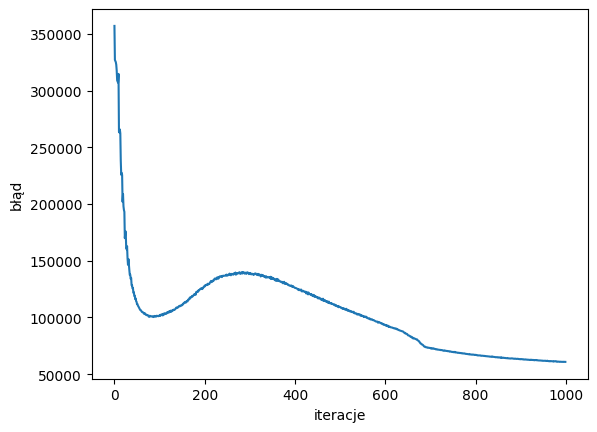

In [12]:
fig = plt.figure()
ax = fig.add_subplot()
ax.plot(range(len(iter_error)), iter_error)
ax.set_xlabel('iteracje')
ax.set_ylabel('błąd')
print(iter_error[-1]/training_data.shape[0])

In [14]:
_, error = rbm.get_recommendations(test_data, get_error=True)
error/test_data.shape[0]

172.18085106382978

In [4]:
testing_learning_rates = [0.05, 0.1, 0.2, 0.4]
rbms = [RBM(training_data, 12, learning_rate=rate, iterations=600, random_seed=42) for rate in testing_learning_rates]
test_results = run_rbms(rbms)

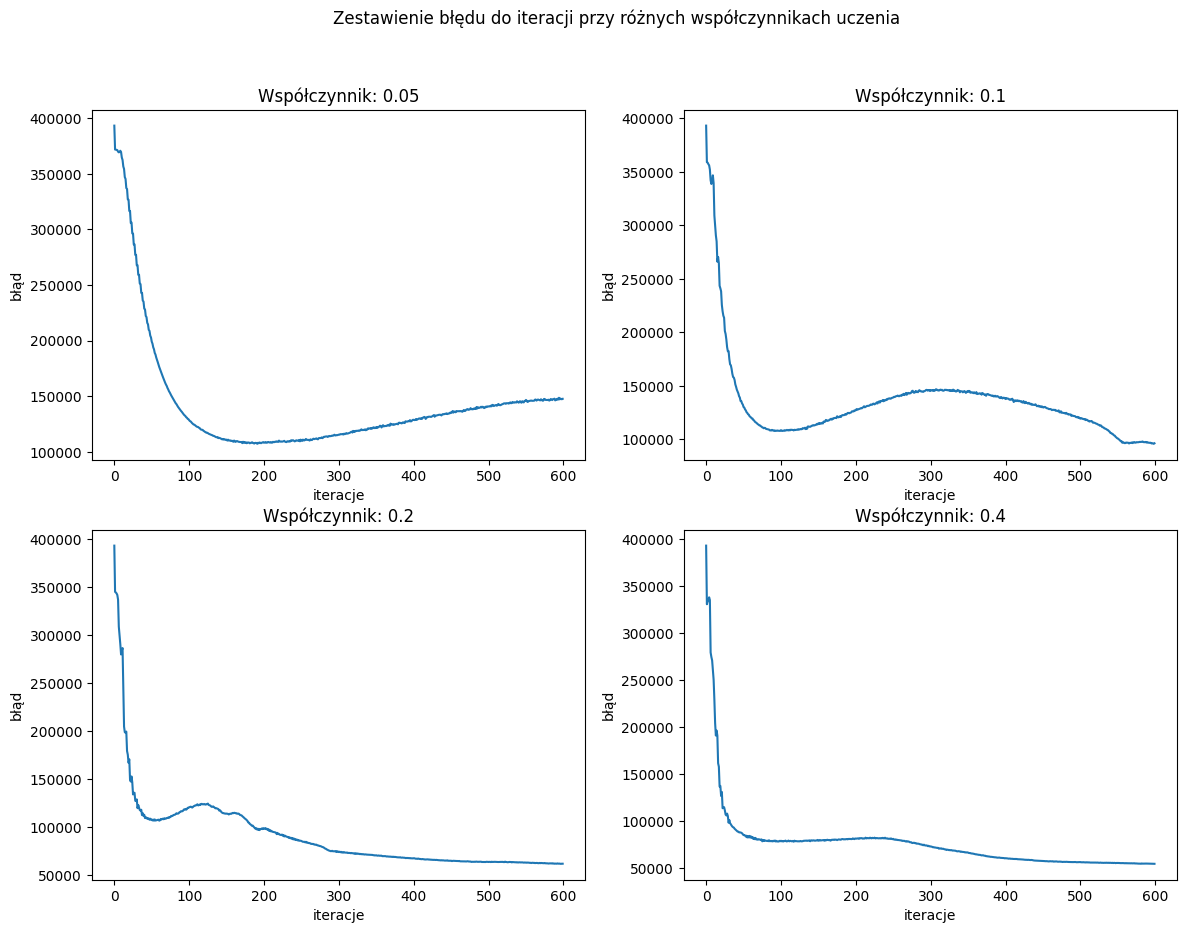

In [8]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Zestawienie błędu do iteracji przy różnych współczynnikach uczenia')
for index, result in enumerate(test_results):
    ax = fig.add_subplot(2,2,index+1)
    rbm, error = result
    ax.plot(range(len(error)), error)
    ax.set_title('Współczynnik: '+str(rbm.get_parameters()['learning_rate']))
    ax.set_xlabel('iteracje')
    ax.set_ylabel('błąd')
plt.show()

In [11]:
testing_hidden_nodes_num = [6, 8, 10, 12]
rbms = [RBM(training_data, hidden_nodes, learning_rate=0.15, iterations=500, random_seed=42) for hidden_nodes in testing_hidden_nodes_num]
test_results = run_rbms(rbms)

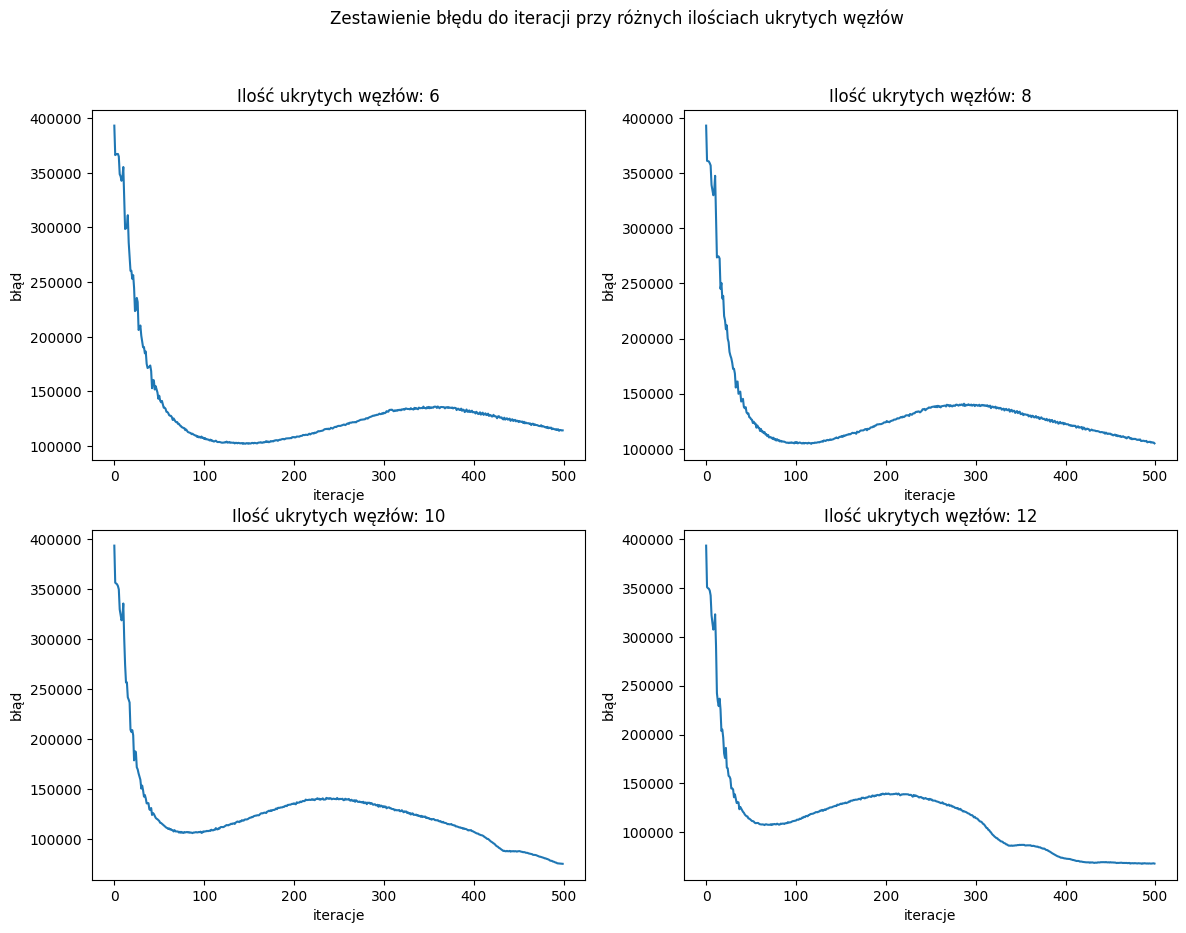

In [13]:
fig = plt.figure(figsize=(14,10))
fig.suptitle('Zestawienie błędu do iteracji przy różnych ilościach ukrytych węzłów')
for index, result in enumerate(test_results):
    ax = fig.add_subplot(2,2,index+1)
    rbm, error = result
    ax.plot(range(len(error)), error)
    ax.set_title('Ilość ukrytych węzłów: '+str(rbm.get_parameters()['hidden_nodes_num']))
    ax.set_xlabel('iteracje')
    ax.set_ylabel('błąd')
plt.show()